In [1]:
#Kaggle : The training dataset (train.csv) contains 42 molecules, their measured photostability lifetime (T80), their SMILES strings (a text representation of a molecule), ~150 calculated features from RDKit (e.g. atom types and shapes) and TD-DFT (e.g. molecular energies and quantum mechanical properties, calculated using ORCA)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#### The training dataset (train.csv) contains 42 molecules, their measured photostability lifetime (T80), their SMILES strings (a text representation of a molecule), ~150 calculated features from RDKit (e.g. atom types and shapes) and TD-DFT (e.g. molecular energies and quantum mechanical properties, calculated using ORCA)

In [2]:
train=pd.read_csv('/kaggle/input/molecular-machine-learning/train.csv')
test=pd.read_csv('/kaggle/input/molecular-machine-learning/test.csv')
train.head()

,Batch_ID,T80,Smiles,Mass,HAcceptors,HDonors,LogP,Asphericity,Rg,TPSA,...,SDOS4.5,SDOS4.6,SDOS4.7,SDOS4.8,SDOS4.9,SDOS5.0,SDOS5.1,SDOS5.2,SDOS5.3,SDOS5.4
0,Train-01,103.86,CCCCCCCCCCCCc1ccsc1-c1ccc(-c2cccs2)cc1,410.692,2,0,9.6070,0.301361,5.187321,0.00,...,1.717761,1.970186,1.760071,1.224983,0.664733,0.282353,0.096763,0.034589,0.030793,0.057340
1,Train-02,101.13,CCCCCCCCCCCCc1ccsc1-c1cccs1,334.594,2,0,7.9400,0.367472,4.141425,0.00,...,0.012396,0.046031,0.133124,0.299840,0.525958,0.718549,0.764711,0.634854,0.414866,0.225909
2,Train-03,78.30,CN1CCN(S(=O)(=O)c2ccc(-c3ccc(-c4cccs4)cc3)cc2)CC1,398.553,4,0,4.0182,0.799589,5.368024,40.62,...,2.421162,2.703267,2.352276,1.595867,0.845839,0.354620,0.127878,0.060600,0.064782,0.098908
3,Train-04,71.88,O=C1c2ccccc2C(=O)c2cc(-c3ccc(-c4cccs4)s3)ccc21,372.470,4,0,5.9190,0.793825,4.948903,34.14,...,0.886320,0.579059,0.345148,0.246564,0.276259,0.381997,0.495304,0.566935,0.594203,0.614075
4,Train-05,68.37,CC(C)(C)OC(=O)n1ccc2ccc(-c3ccc(-c4ccc(-c5cccs5...,457.620,5,0,8.5485,0.671148,5.994751,31.23,...,0.487723,0.245764,0.249019,0.363222,0.474953,0.505358,0.440671,0.330129,0.234649,0.183111


## Too many features - removing one of the features where high correlation

In [3]:
# Step 1: Compute the correlation matrix
corr_matrix = train.corr(numeric_only=True).abs()

# Step 2: Create an upper triangle matrix to avoid redundant comparisons
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 3: Identify columns where the correlation is above a threshold (e.g., 0.9)
high_corr_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.8)]

# Step 4: Remove highly correlated columns
train = train.drop(columns=high_corr_columns)

print("Columns removed:", high_corr_columns)
test = test.drop(columns=high_corr_columns)


Columns removed: ['LogP', 'Rg', 'NumRotatableBonds', 'NumHeteroatoms', 'T1', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'O1', 'TDOS1.6', 'TDOS1.7', 'TDOS1.8', 'TDOS1.9', 'TDOS2.0', 'TDOS2.1', 'TDOS2.2', 'TDOS2.3', 'TDOS2.4', 'TDOS2.5', 'TDOS2.6', 'TDOS2.7', 'TDOS2.8', 'TDOS2.9', 'TDOS3.0', 'TDOS3.1', 'TDOS3.2', 'TDOS3.3', 'TDOS3.4', 'TDOS3.5', 'TDOS3.6', 'TDOS3.7', 'TDOS3.8', 'TDOS3.9', 'TDOS4.0', 'TDOS4.1', 'TDOS4.2', 'TDOS4.3', 'TDOS4.4', 'TDOS4.5', 'TDOS4.6', 'TDOS4.7', 'SDOS2.5', 'SDOS2.6', 'SDOS2.7', 'SDOS2.8', 'SDOS2.9', 'SDOS3.0', 'SDOS3.1', 'SDOS3.2', 'SDOS3.3', 'SDOS3.4', 'SDOS3.5', 'SDOS3.6', 'SDOS3.7', 'SDOS3.8', 'SDOS3.9', 'SDOS4.0', 'SDOS4.1', 'SDOS4.2', 'SDOS4.3', 'SDOS4.4', 'SDOS4.5', 'SDOS4.6', 'SDOS4.7', 'SDOS4.8', 'SDOS4.9', 'SDOS5.0', 'SDOS5.1', 'SDOS5.2', 'SDOS5.

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [4]:
train.head()

,Batch_ID,T80,Smiles,Mass,HAcceptors,HDonors,Asphericity,TPSA,RingCount,HOMOm1(eV),...,O12,O13,O14,O15,O16,O17,O18,O19,O20,TDOS1.5
0,Train-01,103.86,CCCCCCCCCCCCc1ccsc1-c1ccc(-c2cccs2)cc1,410.692,2,0,0.301361,0.00,3,-8.8374,...,0.028070,0.003625,0.038192,0.010176,0.602064,0.016987,0.065429,0.015649,0.118870,6.070000e-15
1,Train-02,101.13,CCCCCCCCCCCCc1ccsc1-c1cccs1,334.594,2,0,0.367472,0.00,2,-9.0870,...,0.013903,0.003854,0.003978,0.175448,0.046715,0.256225,0.023161,0.121842,0.007268,9.920000e-20
2,Train-03,78.30,CN1CCN(S(=O)(=O)c2ccc(-c3ccc(-c4cccs4)cc3)cc2)CC1,398.553,4,0,0.799589,40.62,4,-8.2055,...,0.050212,0.025192,0.101719,0.052117,0.025641,0.390454,0.496920,0.376534,0.119460,1.160000e-15
3,Train-04,71.88,O=C1c2ccccc2C(=O)c2cc(-c3ccc(-c4cccs4)s3)ccc21,372.470,4,0,0.793825,34.14,5,-9.4901,...,0.000229,0.287016,0.182022,0.006671,0.087947,0.000035,0.048012,0.066062,0.021935,3.270000e-06
4,Train-05,68.37,CC(C)(C)OC(=O)n1ccc2ccc(-c3ccc(-c4ccc(-c5cccs5...,457.620,5,0,0.671148,31.23,5,-8.3237,...,0.163030,0.000751,0.347223,0.012588,0.111655,0.257165,0.007408,0.006321,0.088791,6.480000e-09


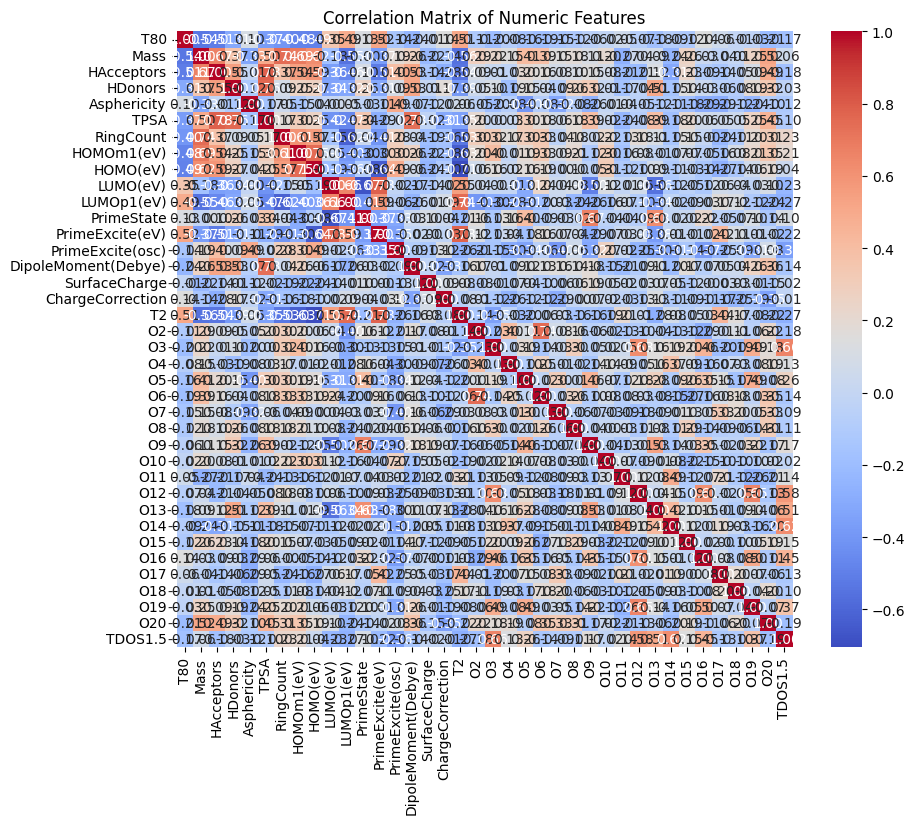

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
corr = train.corr(numeric_only=True)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [6]:

from sklearn.preprocessing import MinMaxScaler

def scale_numerical_columns(train_df, test_df):
    # Select numerical columns
    num_cols = test_df.select_dtypes(include=['number']).columns.tolist()
    num_cols = [col for col in num_cols if col != 'T80']    
    # Initialize scaler
    scaler = MinMaxScaler()
    
    # Fit on train data and transform both train and test
    train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
    test_df[num_cols] = scaler.transform(test_df[num_cols])
    
    return train_df, test_df

# Example usage:
train, test = scale_numerical_columns(train, test)


In [7]:
train.head()

,Batch_ID,T80,Smiles,Mass,HAcceptors,HDonors,Asphericity,TPSA,RingCount,HOMOm1(eV),...,O12,O13,O14,O15,O16,O17,O18,O19,O20,TDOS1.5
0,Train-01,103.86,CCCCCCCCCCCCc1ccsc1-c1ccc(-c2cccs2)cc1,0.224709,0.0,0.0,0.176855,0.000000,0.142857,0.368824,...,0.047975,0.004907,0.025677,0.035083,0.727242,0.011843,0.095076,0.015288,0.225365,2.751090e-12
1,Train-02,101.13,CCCCCCCCCCCCc1ccsc1-c1cccs1,0.125509,0.0,0.0,0.265826,0.000000,0.000000,0.244639,...,0.023663,0.005222,0.000570,0.699135,0.056181,0.178974,0.029461,0.122986,0.011652,0.000000e+00
2,Train-03,78.30,CN1CCN(S(=O)(=O)c2ccc(-c3ccc(-c4cccs4)cc3)cc2)CC1,0.208885,0.2,0.0,0.847357,0.305436,0.285714,0.683218,...,0.085973,0.034525,0.072294,0.203597,0.030716,0.272747,0.764904,0.381288,0.226495,5.257074e-13
3,Train-04,71.88,O=C1c2ccccc2C(=O)c2cc(-c3ccc(-c4cccs4)s3)ccc21,0.174883,0.2,0.0,0.839598,0.256711,0.428571,0.044082,...,0.000197,0.394078,0.131221,0.020999,0.106004,0.000000,0.068038,0.066416,0.039739,1.482078e-03
4,Train-05,68.37,CC(C)(C)OC(=O)n1ccc2ccc(-c3ccc(-c4ccc(-c5cccs5...,0.285884,0.3,0.0,0.674504,0.234830,0.428571,0.624409,...,0.279583,0.000961,0.252447,0.044773,0.134651,0.179632,0.005006,0.005828,0.167765,2.936961e-06


In [8]:
test.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Batch_ID,T80,Smiles,Mass,HAcceptors,HDonors,Asphericity,TPSA,RingCount,HOMOm1(eV),...,O12,O13,O14,O15,O16,O17,O18,O19,O20,TDOS1.5
0,Test-01,NaN,COC(=O)c3ccc(c2ccc(c1ccco1)cc2)s3,0.059993,0.2,0.0,0.843518,0.296564,0.142857,0.200010,...,0.260050,0.236575,0.145109,0.349324,0.010337,0.167135,0.100705,0.102109,0.030333,8.475490e-08
1,Test-02,NaN,CCCCCCc2c(CCCCCC)c(c1cccs1)sc2c3ccc(C(=O)OC)cc3,0.300365,0.2,0.0,0.133131,0.197759,0.142857,0.496492,...,0.026909,0.013600,0.035252,0.329770,0.067654,0.021623,1.139755,0.134728,0.774984,2.406227e-13
2,Test-03,NaN,COC(=O)c3ccc(c2ccc(c1cccc(OC)c1)cc2)s3,0.112221,0.2,0.0,0.909853,0.267163,0.142857,0.486940,...,1.834091,0.039905,0.059015,0.771020,0.175549,0.223698,0.219301,0.003011,0.225890,9.155342e-10
3,Test-04,NaN,CCCCCCc3csc(c2ccc(c1ccc(C(=O)OC)s1)cc2)c3CCCCCC,0.300365,0.2,0.0,0.652270,0.197759,0.142857,0.444748,...,0.032725,0.099976,0.015163,0.021801,0.556877,0.114970,0.089794,0.420028,0.000214,6.390610e-10
4,Test-05,NaN,CCCCCCc1ccsc1c3cc(CCCCCC)c(c2sccc2CCCCCC)s3,0.342282,0.1,0.0,0.318319,0.000000,0.142857,0.407632,...,0.038300,0.023376,0.009756,0.039326,0.058555,0.004373,0.004113,0.198304,0.767724,4.668318e-06


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Batch_ID             42 non-null     object 
 1   T80                  42 non-null     float64
 2   Smiles               42 non-null     object 
 3   Mass                 42 non-null     float64
 4   HAcceptors           42 non-null     float64
 5   HDonors              42 non-null     float64
 6   Asphericity          42 non-null     float64
 7   TPSA                 42 non-null     float64
 8   RingCount            42 non-null     float64
 9   HOMOm1(eV)           42 non-null     float64
 10  HOMO(eV)             42 non-null     float64
 11  LUMO(eV)             42 non-null     float64
 12  LUMOp1(eV)           42 non-null     float64
 13  PrimeState           42 non-null     float64
 14  PrimeExcite(eV)      42 non-null     float64
 15  PrimeExcite(osc)     42 non-null     float

In [10]:
nan_counts = train.isna().sum()
nan_counts = nan_counts[nan_counts > 0]  # Filter only columns with NaNs
print(nan_counts)

Series([], dtype: int64)


In [11]:
nan_counts = test.isna().sum()
nan_counts = nan_counts[nan_counts > 0]  # Filter only columns with NaNs
print(nan_counts)

T80    9
dtype: int64


In [12]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 44.6 MB/s eta 0:00:00


In [13]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.DataStructs import ConvertToNumpyArray

# Function to compute Morgan fingerprints
def smiles_to_morgan(smiles, radius=2, n_bits=128):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.zeros(n_bits)  # Handle invalid SMILES gracefully
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    arr = np.zeros((1, n_bits), dtype=np.int8)
    ConvertToNumpyArray(fp, arr[0])
    return arr[0]

# Apply to DataFrame
train['Morgan_FP'] = train['Smiles'].apply(lambda x: smiles_to_morgan(x))
test['Morgan_FP'] = test['Smiles'].apply(lambda x: smiles_to_morgan(x))

print(train.head())


   Batch_ID     T80                                             Smiles  \
0  Train-01  103.86             CCCCCCCCCCCCc1ccsc1-c1ccc(-c2cccs2)cc1   
1  Train-02  101.13                        CCCCCCCCCCCCc1ccsc1-c1cccs1   
2  Train-03   78.30  CN1CCN(S(=O)(=O)c2ccc(-c3ccc(-c4cccs4)cc3)cc2)CC1   
3  Train-04   71.88     O=C1c2ccccc2C(=O)c2cc(-c3ccc(-c4cccs4)s3)ccc21   
4  Train-05   68.37  CC(C)(C)OC(=O)n1ccc2ccc(-c3ccc(-c4ccc(-c5cccs5...   

       Mass  HAcceptors  HDonors  Asphericity      TPSA  RingCount  \
0  0.224709         0.0      0.0     0.176855  0.000000   0.142857   
1  0.125509         0.0      0.0     0.265826  0.000000   0.000000   
2  0.208885         0.2      0.0     0.847357  0.305436   0.285714   
3  0.174883         0.2      0.0     0.839598  0.256711   0.428571   
4  0.285884         0.3      0.0     0.674504  0.234830   0.428571   

   HOMOm1(eV)  ...       O13       O14       O15       O16       O17  \
0    0.368824  ...  0.004907  0.025677  0.035083  0.727242  0.

[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerator
[17:34:10] DEPRECATION WARNING: please use MorganGenerat

In [14]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, make_scorer

msle_scorer = make_scorer(mean_squared_log_error, greater_is_better=False)

# Convert Morgan fingerprints to a NumPy array
X_fp = np.stack(train['Morgan_FP'].values)  # Shape: (num_samples, num_features)

# Extract other molecular descriptors as a NumPy array
X_other = train.drop(columns=['Batch_ID','T80','Smiles','Morgan_FP']).values

# Combine Morgan fingerprints with other features
X = np.hstack([X_fp, X_other])  # Shape: (num_samples, total_features)

# Target variable
y = train['T80'].values


test_fp = np.stack(test['Morgan_FP'].values)  # Shape: (num_samples, num_features)
test_other = test.drop(columns=['T80','Batch_ID','Smiles','Morgan_FP']).values
X_test = np.hstack([test_fp, test_other])  # Shape: (num_samples, total_features)


In [15]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_log_error
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from lightgbm import early_stopping

kf = KFold(n_splits=5, shuffle=True, random_state=42)
msle_scores = []

# === Hyperparameter grid ===
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'reg_alpha': [0.1, 0.5],
    'reg_lambda': [0.1, 0.5, 1],
    'n_estimators': [10, 25, 50, 100]
}

best_model = None
best_score = float('inf')

for train_idx, val_idx in kf.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42)

    grid = GridSearchCV(
        estimator=lgb_model,
        param_grid=param_grid,
        scoring='neg_mean_squared_log_error',
        cv=3,
        verbose=0,
        n_jobs=-1
    )

    grid.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='msle',
    callbacks=[lgb.early_stopping(100)],
    )

    preds = grid.predict(X_val)
    preds = np.maximum(preds, 0)  # MSLE needs non-negative predictions
    score = mean_squared_log_error(y_val, preds)
    msle_scores.append(score)

    if score < best_score:
        best_score = score
        best_model = grid.best_estimator_

print(f"Avg MSLE across folds: {np.mean(msle_scores):.4f}")
print("Best hyperparameters:", best_model.get_params())


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 33, number of used features: 0
[LightGBM] [Info] Start training from score 23.860909
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopp

In [16]:
# Evaluate on validation set
y_test = best_model.predict(X_test)
y_test

array([24.24787889, 24.24787889, 24.24787889, 24.24787889, 24.24787889,
       24.24787889, 24.24787889, 24.24787889, 24.24787889])

## LGB is doing a bad job. Trying linear models below but with log(T80):

In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_log_error, make_scorer

# Use log-transform since target is positive
y_log = np.log1p(y)

model = Ridge(alpha=1.0)

# MSLE-compatible scorer (log already applied)
msle_scorer = make_scorer(mean_squared_log_error, greater_is_better=False)

# Cross-validation (5-fold)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y_log, cv=cv, scoring=msle_scorer)
print("Mean MSLE:", -np.mean(scores))

Mean MSLE: 0.07838007696760207


In [18]:
model.fit(X, y_log)
# Predict log(T80)
y_log_test = model.predict(X_test)

# Inverse the log1p to get original T80 units
y_test = np.expm1(y_log_test)
y_test

array([11.39275001, 79.27149278, 15.14270306, 26.55893487, 17.09901218,
        6.87535795, 10.75076927,  5.35109595, 21.27065403])

In [19]:
del y_test, y_log_test, model, best_model

# Final: SVR used for final submission as gives lowest MSLE:

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr = SVR()
param_grid = {
    'C': [0.01, 0.025, 0.1, 0.5, 1, 10, 50, 100],
    'epsilon': [0.001, 0.01, 0.1, 0,25, 0.5],
    'kernel': ['rbf'],
    'gamma': [0.001, 0.01, 0.1, 0.5, 'scale', 'auto']
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(mean_squared_log_error, greater_is_better=False)

grid = GridSearchCV(svr, param_grid, cv=cv, scoring=scorer, n_jobs=-1)
grid.fit(X, y_log)

print("Best Params:", grid.best_params_)
print("Best MSLE (log-transformed):", -grid.best_score_)

Best Params: {'C': 10, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best MSLE (log-transformed): 0.057820197456318376


In [21]:
y_log_test = grid.best_estimator_.predict(X_test)
# Convert back to original T80
y_test = np.expm1(y_log_test)
y_test

array([18.55456151, 36.53138786, 18.10396957, 23.68186357, 21.45839378,
        7.33825428, 10.2640131 ,  4.94484897, 20.65185256])

In [22]:
df_results = pd.DataFrame({'Batch_ID': test['Batch_ID'], 'T80': y_test})

# Save to an Excel file with the first row as a header
df_results.to_csv("submission.csv", index=False)

print("Saved predictions to 'predictions.xlsx'")

Saved predictions to 'predictions.xlsx'
